In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

using histmatching function

In [2]:
def histMatching(in_img,ref_img):
    # getting histogram
    out = np.copy(in_img)
    count_out = np.zeros(256)
    for i in out.flatten():
        count_out[i] += 1
    count_ref = np.zeros(256)
    for i in ref_img.flatten():
        count_ref[i] += 1
    # cumsum
    for i in range(255):
        count_out[i + 1] += count_out[i]
    for i in range(255):
        count_ref[i + 1] += count_ref[i]
    # Normalization
    arr_out = (count_out - count_out.min()) * 255
    arr_ref = (count_ref - count_ref.min()) * 255
    scale_out = count_out.max() - count_out.min()
    scale_ref = count_ref.max() - count_ref.min()
    count_out = arr_out/scale_out
    count_ref = arr_ref/scale_ref
    count_out = count_out.astype('uint8')
    count_ref = count_ref.astype('uint8')
    # We map each pixel x to the pixel value y so that the pixel x value in the input picture histogram is closest to the pixel y value in the reference image histogram.
    mapping = np.array([ np.abs(count_ref - count_out[i]).argmin() for i in range(256) ])
    for x in range(out.shape[0]):
        for y in range(out.shape[1]):
            out[x][y] = mapping[out[x][y]]
    return out
    

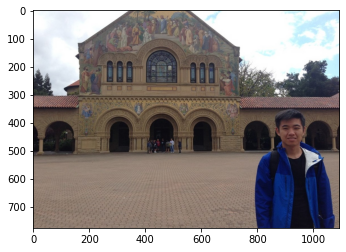

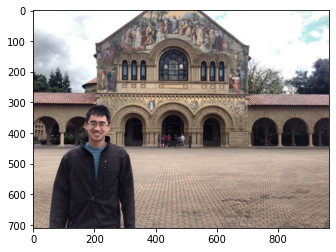

In [7]:
jim = cv2.imread('man2.jpg')
dan = cv2.imread('man.png')
jim = cv2.cvtColor(jim,cv2.COLOR_BGR2RGB)
dan = cv2.cvtColor(dan,cv2.COLOR_BGR2RGB)
plt.imshow(jim)
plt.figure()
plt.imshow(dan)
plt.show()

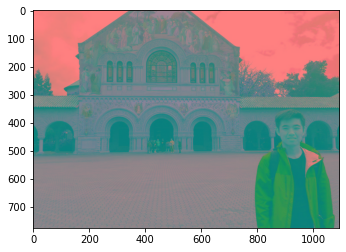

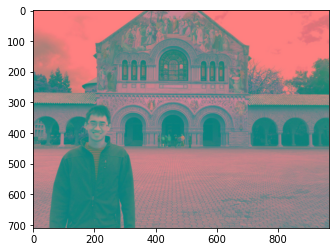

In [8]:
jim_lab = cv2.cvtColor(jim,cv2.COLOR_RGB2LAB)
dan_lab = cv2.cvtColor(dan,cv2.COLOR_RGB2LAB)
plt.imshow(jim_lab)
plt.figure()
plt.imshow(dan_lab)
plt.show()

In [5]:
jim_l = jim_lab[:,:,0]
dan_l = dan_lab[:,:,0]
out = histMatching(jim_l,dan_l)
jim_lab_copy = jim_lab
jim_lab_copy[:,:,0] = out

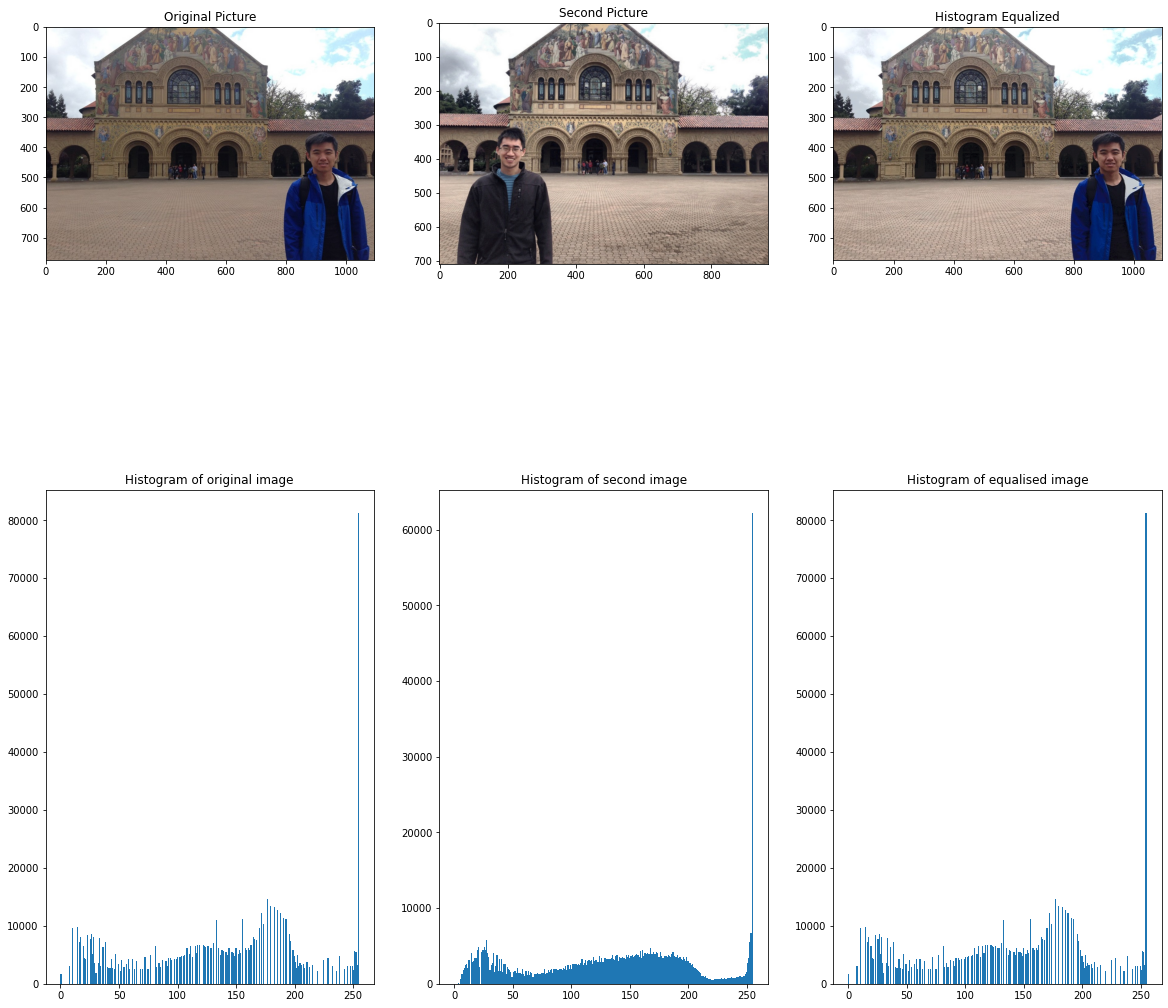

In [6]:
jim_out = cv2.cvtColor(jim_lab_copy,cv2.COLOR_Lab2RGB)

fig = plt.figure(figsize = (20,20))
plt.subplot(2,3,1)
plt.imshow(jim)
plt.title('Original Picture')
plt.subplot(2,3,2)
plt.imshow(dan)
plt.title('Second Picture')
plt.subplot(2,3,3)
plt.imshow(jim_out)
plt.show
plt.title('Histogram Equalized')
plt.subplot(2,3,4)
plt.hist(jim_l.ravel(),256,[0,255])
plt.title('Histogram of original image')
plt.subplot(2,3,5)
plt.hist(dan_l.ravel(),256,[0,255])
plt.title('Histogram of second image')
plt.subplot(2,3,6)
plt.hist(out.ravel(),256,[0,255])
plt.title('Histogram of equalised image')
plt.show()